In [53]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [54]:
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m * x + b + np.random.randn(*x.shape) + 0.25

[0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454545 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474747 3.51515152 3.55555556 3.595959

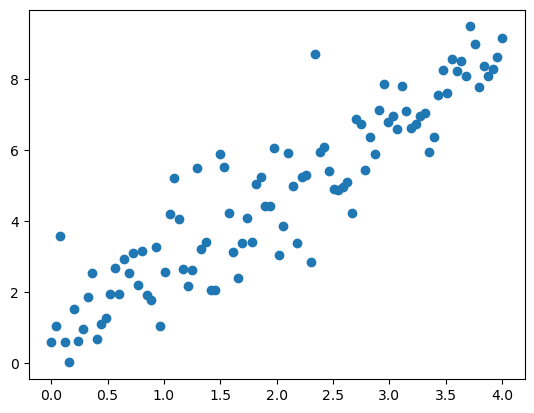

In [55]:
print(x)
plt.scatter(x,y)

In [56]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias
    
def calculate_loss(y_actual, y_predict):
    return tf.reduce_mean(tf.square(y_actual - y_predict))
    
#model = Model()
#model(5.0)
    #self.weight.assign_sub(15.0)

In [57]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_predict = model(x)
        loss = calculate_loss(y, y_predict)
        
    new_weight, new_bias = gt.gradient(loss, [model.weight, model.bias])
    model.weight.assign_sub(new_weight * learning_rate)
    model.bias.assign_sub(new_bias * learning_rate)

In [58]:
model = Model()
epochs = 100
learning_rate = 0.15
for epoch in range(epochs):
    y_predict = model(x)
    loss = calculate_loss(y, y_predict)
    print(f"Epoch: {epoch}, loss: {loss.numpy()}")
    train(model, x, y, learning_rate)

Epoch: 0, loss: 728.1443481445312
Epoch: 1, loss: 517.1614990234375
Epoch: 2, loss: 367.5773010253906
Epoch: 3, loss: 261.5004577636719
Epoch: 4, loss: 186.25608825683594
Epoch: 5, loss: 132.86441040039062
Epoch: 6, loss: 94.96331024169922
Epoch: 7, loss: 68.04492950439453
Epoch: 8, loss: 48.91499328613281
Epoch: 9, loss: 35.309783935546875
Epoch: 10, loss: 25.624853134155273
Epoch: 11, loss: 18.722858428955078
Epoch: 12, loss: 13.797441482543945
Epoch: 13, loss: 10.276750564575195
Epoch: 14, loss: 7.755137920379639
Epoch: 15, loss: 5.944760799407959
Epoch: 16, loss: 4.6412739753723145
Epoch: 17, loss: 3.6995415687561035
Epoch: 18, loss: 3.0164151191711426
Epoch: 19, loss: 2.5185277462005615
Epoch: 20, loss: 2.1536474227905273
Epoch: 21, loss: 1.8845471143722534
Epoch: 22, loss: 1.6846576929092407
Epoch: 23, loss: 1.5349838733673096
Epoch: 24, loss: 1.4219176769256592
Epoch: 25, loss: 1.3356871604919434
Epoch: 26, loss: 1.2692540884017944
Epoch: 27, loss: 1.2175321578979492
Epoch: 28, 

In [59]:
print(model.weight.numpy())
print(model.bias.numpy())

1.9332278
0.86241317


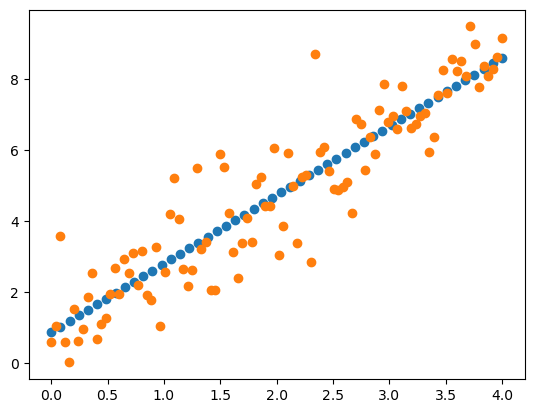

In [60]:
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()
plt.scatter(new_x, new_y)
plt.scatter(x,y)